In [97]:
%matplotlib inline

In [98]:
# Import Dependencies
import json
import requests
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as st


In [99]:
# Import csv file and make DataFrame
uber_data = Path("../Resources/Uber_Project_CSV.csv")
uber_df = pd.read_csv(uber_data)
uber_df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [100]:
#Import URL and API CSV file
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/new%2520york%2520city/2015-01-01/2015-06-30?elements=datetime%2CdatetimeEpoch%2Ctemp%2Ctempmax%2Ctempmin%2Cprecip%2Cwindspeed%2Cwindgust%2Cfeelslike%2Cfeelslikemax%2Cfeelslikemin%2Cpressure%2Cstations%2Cdegreedays%2Caccdegreedays&include=fcst%2Cobs%2Chistfcst%2Cstats%2Chours&key=9R8U63UTPUJVYD92WRCVMZZXB&options=preview&contentType=json"
weather_api = Path("../Resources/NYC_Weather_API_data.csv")
weather_df= pd.read_csv(weather_api)
weather_df.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,new york city,1/1/2015,38.7,27.3,32.8,35.8,17.1,25.6,9.6,37.7,...,9.9,5,NaN,2015-01-01T07:20:09,2015-01-01T16:39:07,0.38,Clear,Clear conditions throughout the day.,clear-day,"72505394728,KLGA,KNYC,72503014732"
1,new york city,1/2/2015,42.2,36.0,38.6,36.5,28.1,32.2,16.8,41.0,...,9.5,5,NaN,2015-01-02T07:20:15,2015-01-02T16:39:58,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,72503014732"
2,new york city,1/3/2015,40.7,33.5,35.8,35.0,25.9,30.2,26.1,69.4,...,5.2,3,NaN,2015-01-03T07:20:19,2015-01-03T16:40:50,0.45,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72505394728,KLGA,KNYC,72503014732"
3,new york city,1/4/2015,55.4,41.0,48.2,55.4,36.6,46.6,44.6,87.4,...,3.8,3,NaN,2015-01-04T07:20:20,2015-01-04T16:41:44,0.50,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"72505394728,KLGA,KNYC,72503014732"
4,new york city,1/5/2015,50.3,21.8,36.3,50.3,11.4,27.8,12.2,37.1,...,9.9,5,NaN,2015-01-05T07:20:19,2015-01-05T16:42:40,0.52,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KLGA,KNYC,72503014732"


In [101]:
#Isolate short rain pickups
rain_data_df = uber_df[["pickup_dt","borough", "pickups", "pcp01", "pcp06", "pcp24"]]
short_rain_df = rain_data_df[(rain_data_df["pcp01"] > 0) & (rain_data_df["pcp06"] == 0) & (rain_data_df["pcp24"] == 0)]
short_rain_chart_df =short_rain_df[["pickup_dt", "borough", "pickups"]]
short_rain_chart_df = short_rain_chart_df.groupby("borough").agg({"pickups":"sum"}).reindex()
short_rain_chart_df

,pickups
borough,
Bronx,8584
Brooklyn,94105
EWR,1
Manhattan,447622
Queens,53488
Staten Island,275


In [102]:
#Find total and average pickups for short rain
short_rain_df = short_rain_df.astype({"pickup_dt":"datetime64[D]"})
avg_short_rain = short_rain_df.groupby("pickup_dt").agg({"pickups": "sum"}).reindex()
days_of_short_rain = avg_short_rain.count()
total_short_rain = sum(avg_short_rain["pickups"])
avg_short_rain_total = total_short_rain/days_of_short_rain
avg_short_rain_total = int(avg_short_rain_total.round(2))
avg_short_rain_total

15495

In [103]:
#Isolate medium rain pickups
medium_rain_df = rain_data_df[(rain_data_df["pcp06"] > 0) & (rain_data_df["pcp01"] == 0) & (rain_data_df["pcp24"] == 0)]
medium_rain_chart_df = medium_rain_df[["borough", "pickups"]]
medium_rain_chart_df = medium_rain_chart_df.groupby("borough").agg({"pickups":"sum"}).reindex()
medium_rain_chart_df

,pickups
borough,
Bronx,21022
Brooklyn,234293
EWR,5
Manhattan,917997
Queens,130854
Staten Island,681


In [104]:
#Find total and average pickups for medium rain
medium_rain_df = medium_rain_df.astype({"pickup_dt":"datetime64[D]"})
avg_medium_rain = medium_rain_df.groupby("pickup_dt").agg({"pickups": "sum"}).reindex()
days_of_medium_rain = avg_medium_rain.count()
total_medium_rain = sum(avg_medium_rain["pickups"])
avg_medium_rain_total = total_medium_rain/days_of_medium_rain
avg_medium_rain_total = int(avg_medium_rain_total.round(2))
avg_medium_rain_total

20397

In [105]:
#ISolate heavy rain pickups
heavy_rain_df = rain_data_df[(rain_data_df["pcp24"] > 0) & (rain_data_df["pcp01"] == 0) & (rain_data_df["pcp06"] == 0)]
heavy_rain_chart_df = heavy_rain_df[["borough", "pickups","pcp24"]]
heavy_rain_chart_df = heavy_rain_chart_df.groupby("borough").agg({"pickups":"sum"}).reindex()
heavy_rain_chart_df

,pickups
borough,
Bronx,50038
Brooklyn,514271
EWR,31
Manhattan,2433263
Queens,318784
Staten Island,1513


In [131]:
#Find total pickups and average pickups for heavy rain
heavy_rain_df = heavy_rain_df.astype({"pickup_dt":"datetime64[D]"})
avg_heavy_rain = heavy_rain_df.groupby("pickup_dt").agg({"pickups": "sum"}).reindex()
days_of_heavy_rain = avg_heavy_rain.count()
total_heavy_rain = sum(avg_heavy_rain["pickups"])
avg_heavy_rain_total = total_heavy_rain/days_of_heavy_rain
avg_heavy_rain_total = int(avg_heavy_rain_total.round(0))
avg_heavy_rain_total

3319423

In [107]:
#Isolate snow pickups
snow_data_df = uber_df[["pickup_dt", "borough", "pickups", "sd"]]
snow_df = snow_data_df[(snow_data_df["sd"] > 0)]
snow_chart_df = snow_df[["borough", "pickups",]]
snow_chart_df = snow_chart_df.groupby("borough").agg({"pickups":"sum"}).reindex()
snow_chart_df


,pickups
borough,
Bronx,53225
Brooklyn,623687
EWR,27
Manhattan,3149007
Queens,351742
Staten Island,1643


In [108]:
# Find the total and average snow pickups
snow_df = snow_df.astype({"pickup_dt":"datetime64[D]"})
avg_snow = snow_df.groupby("pickup_dt").agg({"pickups": "sum"}).reindex()
days_of_snow = avg_snow.count()
total_snow = sum(avg_snow["pickups"])
avg_snow_total = total_snow/days_of_snow
avg_snow_total = int(avg_snow_total.round(0))
avg_snow_total

70864

In [109]:
#Isolate pickups for no precipitation
no_precipitation_data_df = uber_df[(uber_df["pcp01"] == 0) & (uber_df["pcp06"] == 0) & (uber_df["pcp24"] == 0) & (uber_df["sd"] == 0)]
no_precipitation_chart_df = no_precipitation_data_df[["borough", "pickups"]]
no_precipitation_chart_df = no_precipitation_chart_df.groupby("borough").agg({"pickups":"sum"}).reindex()
no_precipitation_chart_df

,pickups
borough,
Bronx,92588
Brooklyn,925314
EWR,39
Manhattan,3907896
Queens,530198
Staten Island,2971


In [110]:
#Find the total and average pickups with no precipitation
no_precipitation_data_df= no_precipitation_data_df.astype({"pickup_dt":"datetime64[D]"})
avg_no_precipitation = no_precipitation_data_df.groupby("pickup_dt").agg({"pickups": "sum"}).reindex()
days_of_no_precipitation = avg_no_precipitation.count()
total_no_precipitation = sum(avg_no_precipitation["pickups"])
avg_no_precipitation_total = total_no_precipitation/days_of_no_precipitation
avg_no_precipitation_total = int(avg_no_precipitation_total.round(2))
avg_no_precipitation_total

47081

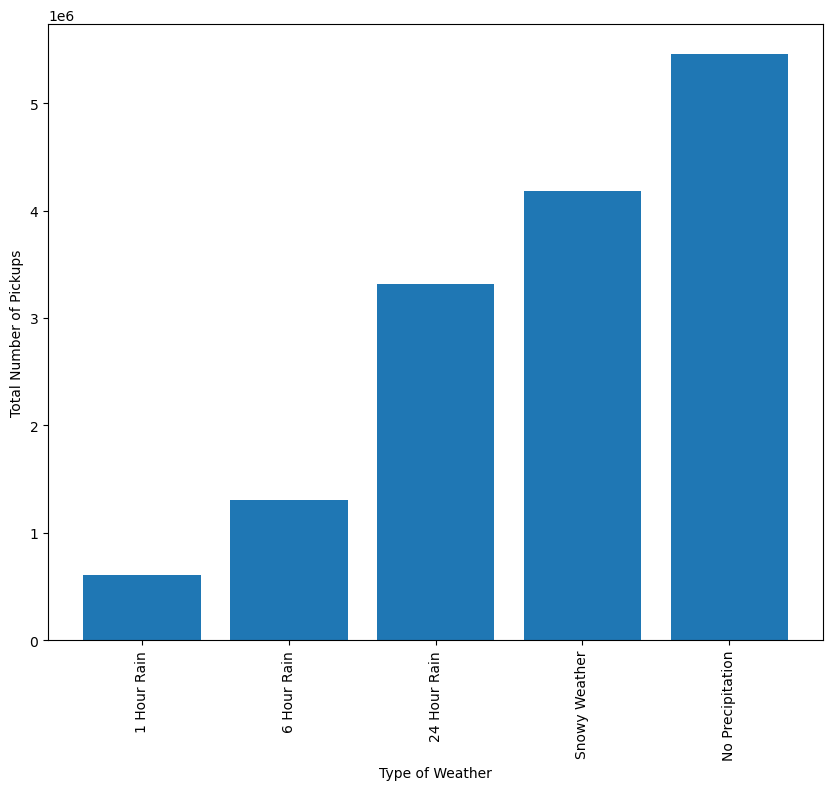

In [140]:
#Create a data frame and bar chart that shows total pickups by different weather type
total_weather = {"Type of Weather": ["1 Hour Rain", "6 Hour Rain", "24 Hour Rain", "Snowy Weather", "No Precipitation"],
                  "Total Pickups": [total_short_rain, total_medium_rain, total_heavy_rain, total_snow, total_no_precipitation]
                  }


total_weather_df = pd.DataFrame(total_weather)

x_axis = np.arange(len(total_weather_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,8))
plt.bar(x_axis, total_weather_df["Total Pickups"], align="center")
plt.xticks(tick_locations, total_weather_df["Type of Weather"], rotation="vertical")
plt.xlabel("Type of Weather")
plt.ylabel("Total Number of Pickups")
plt.show()



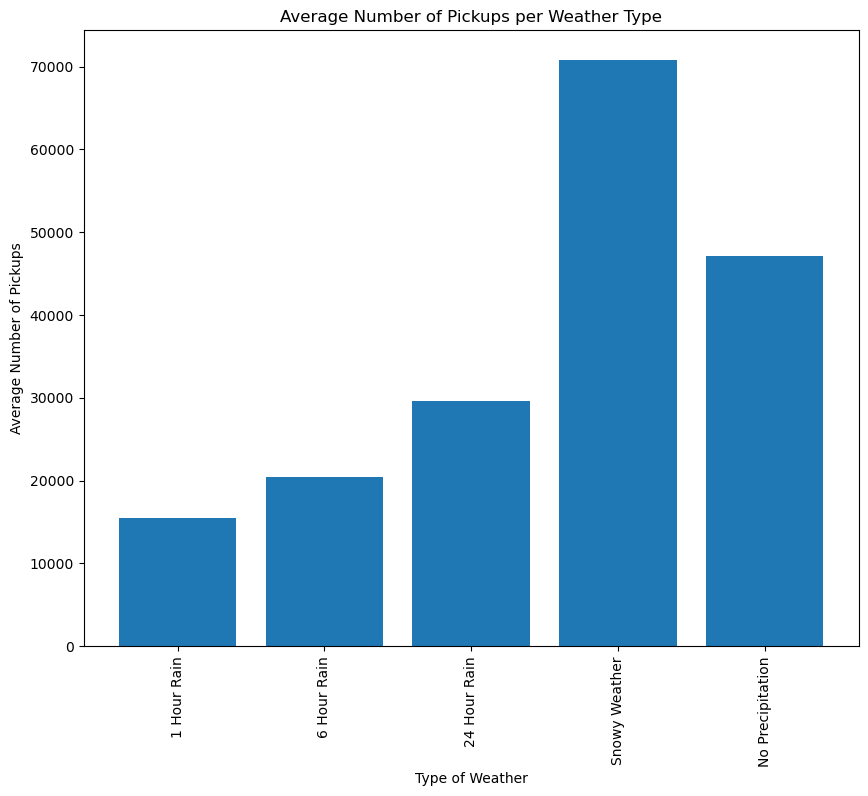

In [129]:
#create a dataframe and bar chart that shows average pickups by different weather type
avg_total_weather = {"Type of Weather": ["1 Hour Rain", "6 Hour Rain", "24 Hour Rain", "Snowy Weather", "No Precipitation"],
                     "Average Pickups": [avg_short_rain_total, avg_medium_rain_total, avg_heavy_rain_total, avg_snow_total, avg_no_precipitation_total]

}
avg_weather_df = pd.DataFrame(avg_total_weather)

x_axis = np.arange(len(avg_weather_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10, 8))
plt.bar(x_axis, avg_weather_df["Average Pickups"], align="center")
plt.xticks(tick_locations, avg_weather_df["Type of Weather"], rotation ="vertical")
plt.xlabel("Type of Weather")
plt.ylabel("Average Number of Pickups")
plt.title("Average Number of Pickups per Weather Type")
plt.show()


In [113]:
# Does Wind Speed affect the number of pickups? How does wind with or without precipitation affect it? - Ryan
wind_df= uber_df[["pickup_dt", "borough", "pickups", "spd"]]

wind_df.head()


,pickup_dt,borough,pickups,spd
0,1/1/2015 1:00,Bronx,152,5.0
1,1/1/2015 1:00,Brooklyn,1519,5.0
2,1/1/2015 1:00,EWR,0,5.0
3,1/1/2015 1:00,Manhattan,5258,5.0
4,1/1/2015 1:00,Queens,405,5.0


In [114]:
#Does different boroughs? Ryan

In [115]:
# Time of day effect pickups? - Fidel

In [116]:
#Difference in Weekdays vs Weekends? - James

In [117]:
#How do Holidays affect pickups? - Fidel Carillo Average holiday pickups vs non holiday with rain and vs non holiday without Difference in Holiday pickups? - Fidel

In [118]:
# Correlation and Regression

## Analysis